# Building A Machine Learning Model

## Project Name: House Prices Prediction: Linear Regression
The main aim of this project is to predict the house price based on their square footage and the number of bedrooms and bathrooms.

In [1]:
# Import Necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("house_data.csv")  # Load the dataset

## Now First we Start The Data Analysis

In [3]:
df.shape  # Check the shape of the dataset

(4600, 18)

In [4]:
df.head()  # Display the first few rows of the dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.describe()  # Display summary statistics of the dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Checking Missing Values

In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df = df.drop('date', axis=1)  # Remove the 'date' column from the dataset

In [9]:
# Convert 'bedrooms' and 'bathrooms' columns to integer data type
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)

Number of numerical variables: 13
       price  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0   313000.0         1340      7912     1.5           0     0          3   
1  2384000.0         3650      9050     2.0           0     4          5   
2   342000.0         1930     11947     1.0           0     0          4   
3   420000.0         2000      8030     1.0           0     0          4   
4   550000.0         1940     10500     1.0           0     0          4   

   sqft_above  sqft_basement  yr_built  yr_renovated  bedrooms  bathrooms  
0        1340              0      1955          2005         3          1  
1        3370            280      1921             0         5          2  
2        1930              0      1966             0         3          2  
3        1000           1000      1963             0         3          2  
4        1140            800      1976          1992         4          2  


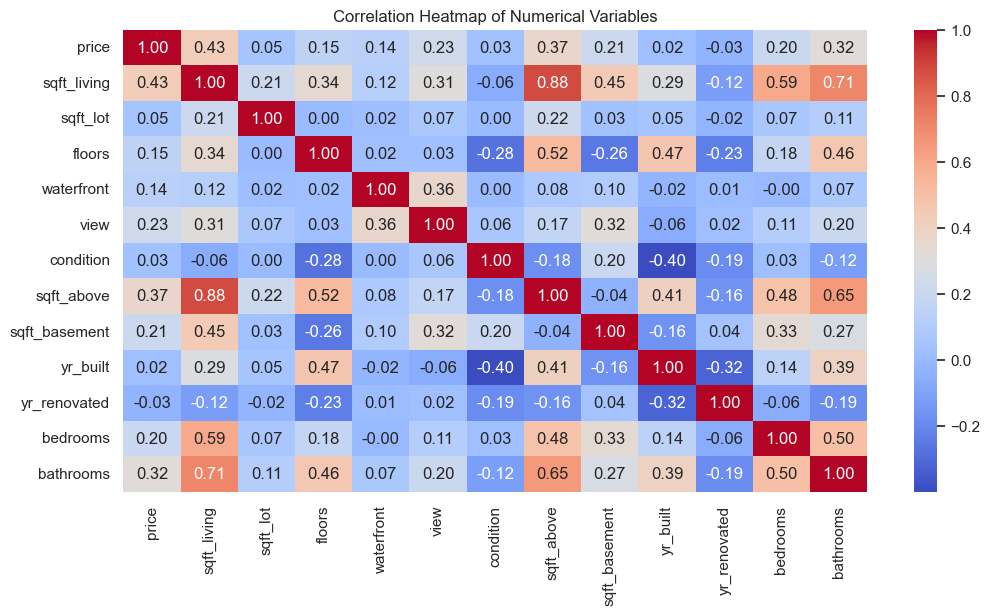

In [10]:
# Step 1: Identify numerical variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.append(pd.Index(['bedrooms', 'bathrooms']))

# Step 2: Print the number of numerical variables
print('Number of numerical variables:', len(numerical_features))

# Step 3: Visualize the first few rows of the numerical variables
numerical_data = df[numerical_features]
print(numerical_data.head())

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [11]:
# list of the variables that contain year information
year_feature = [feature for feature in numerical_features if 'yr' in feature or 'Year' in feature]
year_feature

['yr_built', 'yr_renovated']

In [12]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df[feature].unique())

yr_built [1955 1921 1966 1963 1976 1938 1989 1985 1945 1948 1909 1980 1939 1965
 1956 1997 1987 1983 1923 1954 2005 1991 1959 1920 1979 1951 1967 2004
 2014 1995 1944 1992 1957 1978 1974 1950 1990 1949 1968 1977 1996 2001
 2000 1929 2006 2008 2009 2012 2013 2007 1986 1973 1988 1900 1928 1982
 1960 2003 1998 1942 1908 1958 1971 1975 1961 1924 1902 1962 1953 1999
 1994 1930 1984 2010 1912 1947 1916 1940 1970 1952 1964 1926 1905 1969
 1903 1943 1993 1946 1910 1904 1981 1906 1922 2011 2002 1917 1913 1914
 1937 1925 1932 1918 1972 1941 1919 1936 1911 1927 1931 1901 1907 1915
 1935 1933 1934]
yr_renovated [2005    0 1992 1994 2010 1988 2009 1969 2000 1979 1989 2014 1999 2003
 1983 1997 1912 1923 1954 2011 2001 2013 2006 1972 1985 1998 2004 1958
 2008 1970 1982 1986 1996 2002 1971 1990 1956 1945 1984 2012 1993 2007
 1981 1974 1963 1968 1995 1934 1953 1966 1955 1987 1960 1978 1980 1948
 1991 1913 1977 1975]


### Here we will compare the difference between All years feature with SalePrice

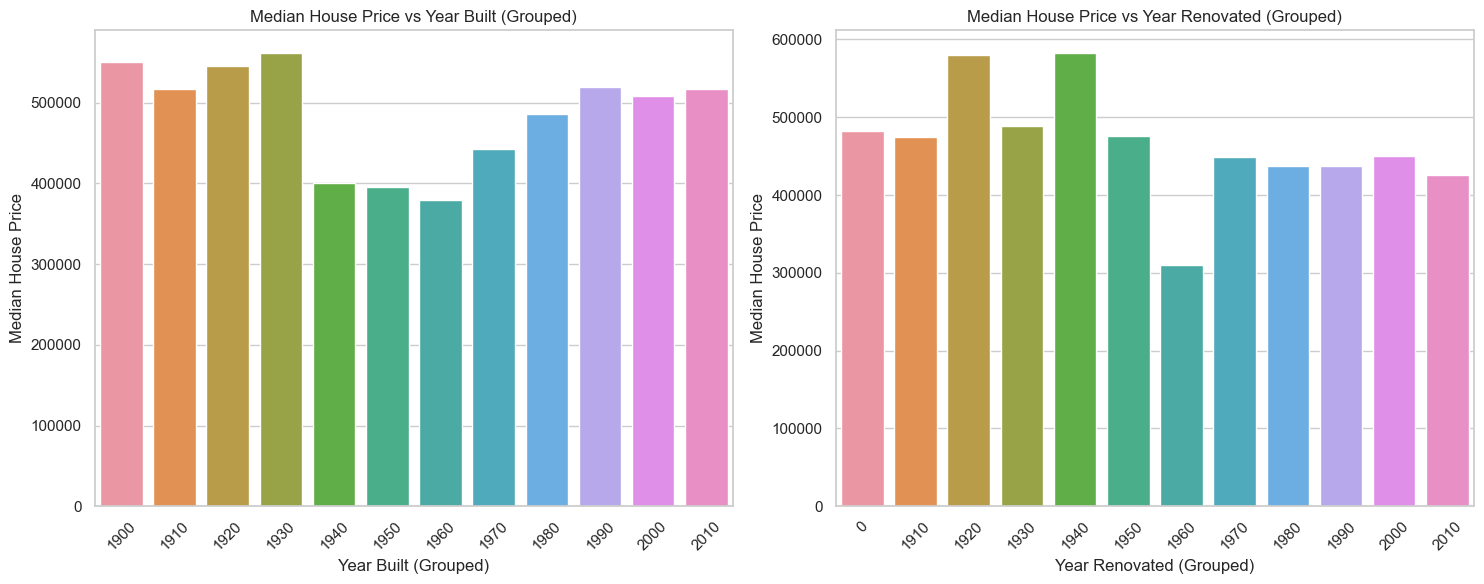

In [13]:
# Filter out years with zero or very low median prices (for clarity)
filtered_df = df[df['price'] > 0].copy()

# Group 'yr_built' and 'yr_renovated' into 10-year intervals
filtered_df['yr_built_grouped'] = filtered_df['yr_built'] // 10 * 10
filtered_df['yr_renovated_grouped'] = filtered_df['yr_renovated'] // 10 * 10

# Group by 'yr_built_grouped' and calculate the median price
median_prices_built = filtered_df.groupby('yr_built_grouped')['price'].median()
# Group by 'yr_renovated_grouped' and calculate the median price
median_prices_renovated = filtered_df.groupby('yr_renovated_grouped')['price'].median()

# Create subplots for better visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 'yr_built'
sns.barplot(x=median_prices_built.index, y=median_prices_built.values, ax=axes[0])
axes[0].set(xlabel='Year Built (Grouped)', ylabel='Median House Price', title='Median House Price vs Year Built (Grouped)')
axes[0].tick_params(axis='x', rotation=45)

# Plot for 'yr_renovated'
sns.barplot(x=median_prices_renovated.index, y=median_prices_renovated.values, ax=axes[1])
axes[1].set(xlabel='Year Renovated (Grouped)', ylabel='Median House Price', title='Median House Price vs Year Renovated (Grouped)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Here we find the type of variable in data
Whether it is 
1. Discrete
2. Continuous
3. Categorical

In [14]:
# Create lists to store variable types
discrete_features = []
continuous_features = []
temporal_features = []

# Loop through the columns and classify them as discrete, continuous, or temporal
for column in df.columns:
    if column in ['yr_built', 'yr_renovated']:
        # Treat 'yr_built' and 'yr_renovated' as temporal
        temporal_features.append(column)
    elif pd.api.types.is_integer_dtype(df[column]):
        # Treat integer columns (excluding 'yr_built' and 'yr_renovated') as discrete
        if column not in ['yr_built', 'yr_renovated']:
            discrete_features.append(column)
    elif pd.api.types.is_float_dtype(df[column]):
        # Treat float columns as continuous
        continuous_features.append(column)

# Print the results
print("Discrete Numerical Features:")
print(discrete_features)
print("\nContinuous Numerical Features:")
print(continuous_features)
print("\nTemporal Features:")
print(temporal_features)

Discrete Numerical Features:
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement']

Continuous Numerical Features:
['price', 'floors']

Temporal Features:
['yr_built', 'yr_renovated']


### Discrete Variable

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


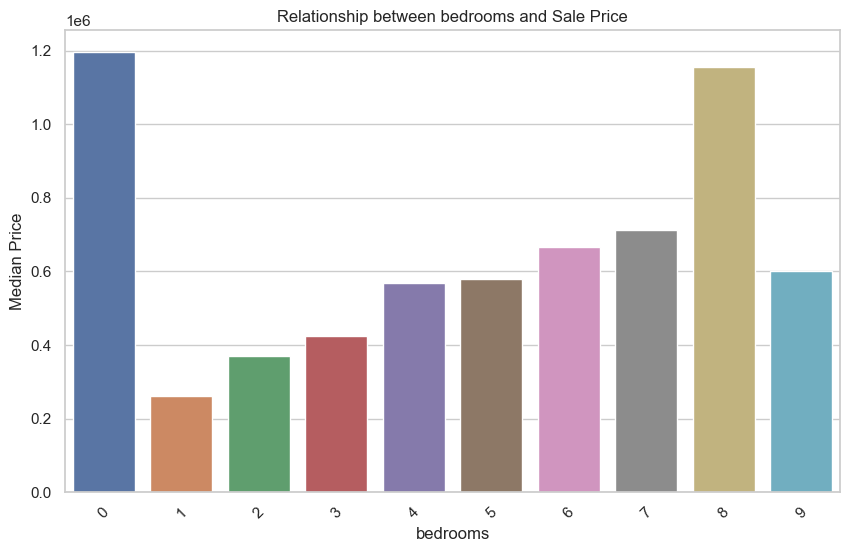

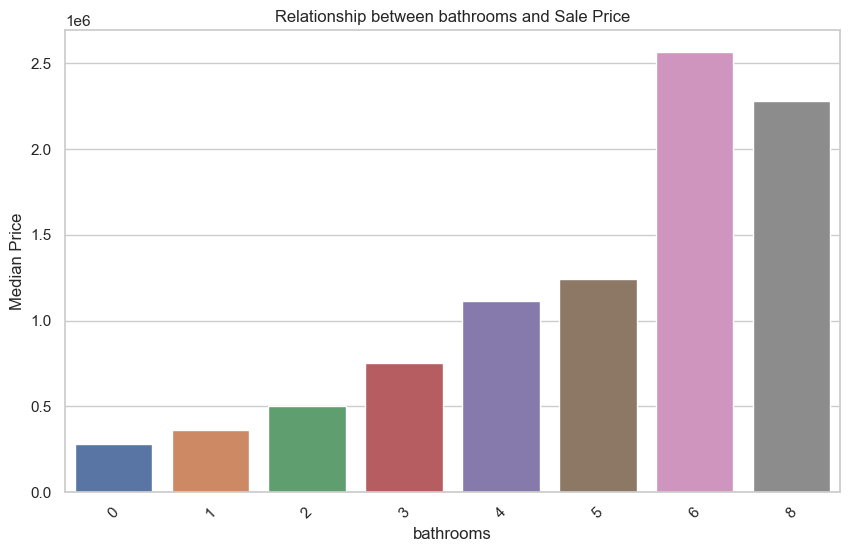

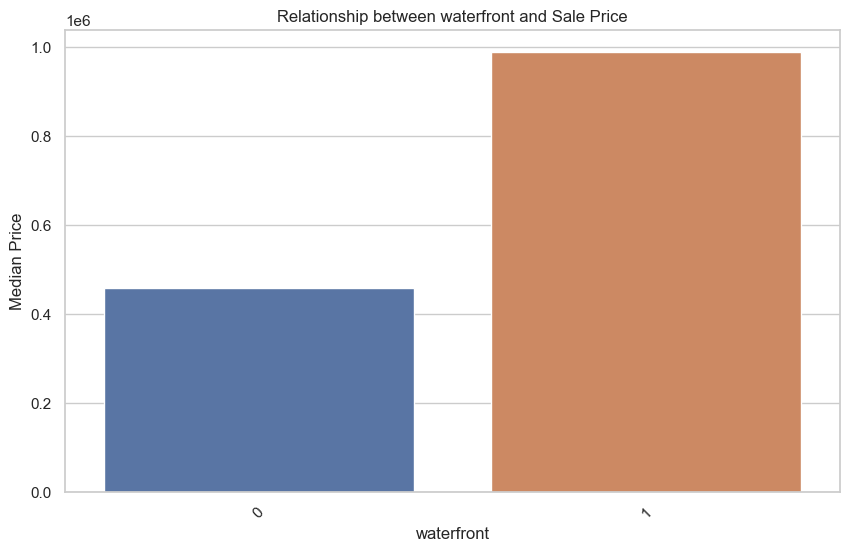

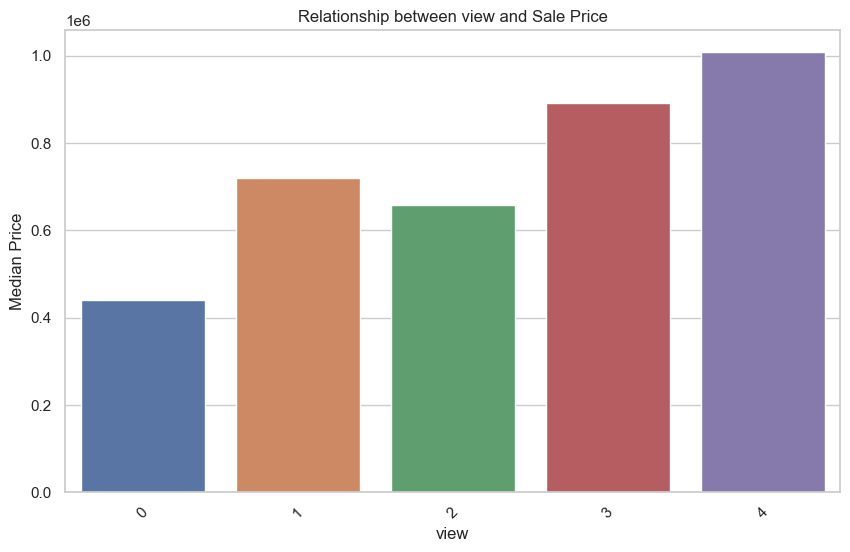

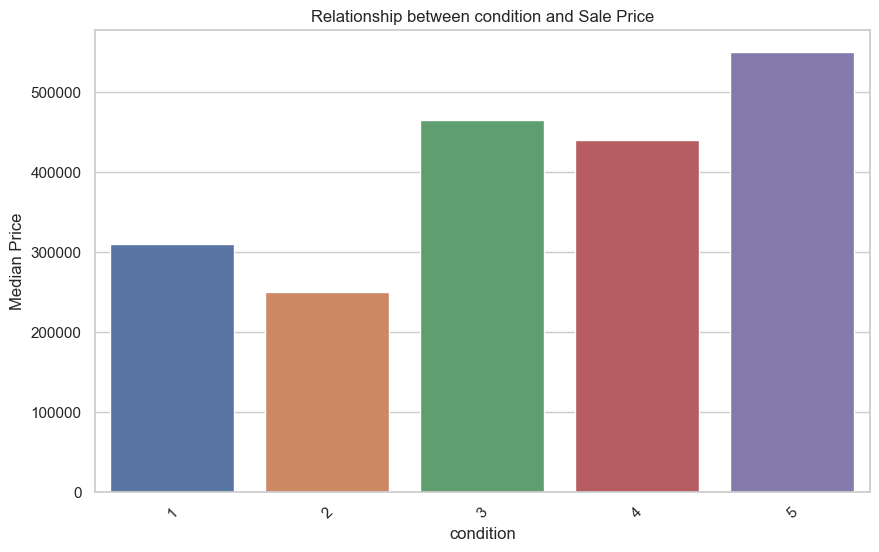

In [16]:
# Define the list of discrete features to plot
selected_features = ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition']

# Iterate through the selected discrete features
for feature in selected_features:
    data = df.copy()
    median_prices = data.groupby(feature)['price'].median()
    
    # Create subplots for better visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=median_prices.index, y=median_prices.values, ax=ax)
    
    # Add labels and titles
    ax.set(xlabel=feature, ylabel='Median Price', title=f'Relationship between {feature} and Sale Price')
    
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

### Continuous Variable

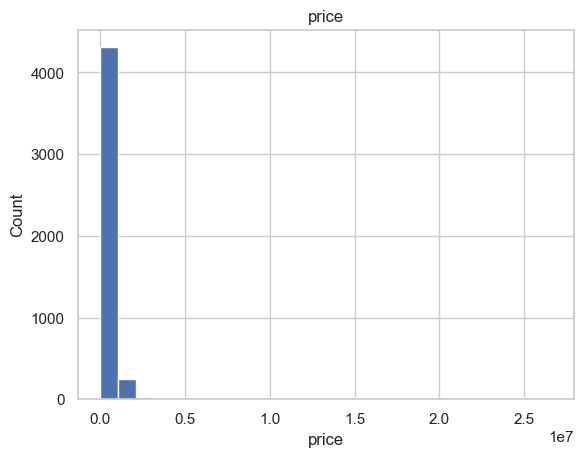

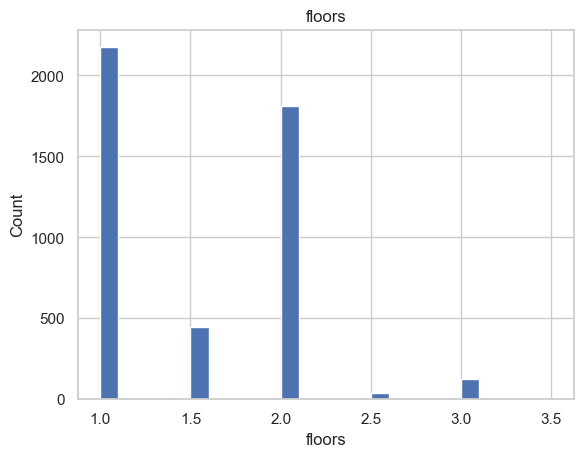

In [17]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers

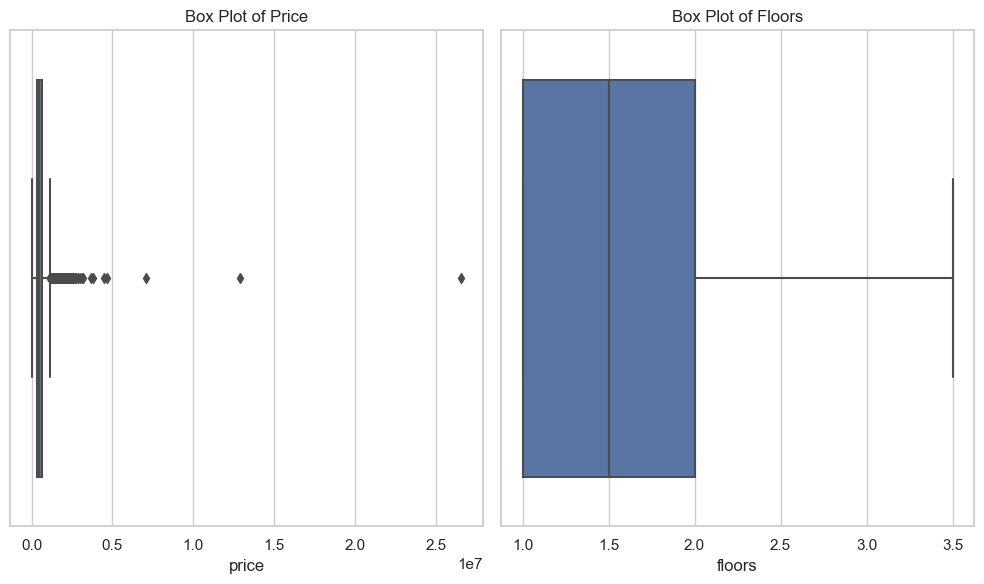

In [18]:
# Create a copy of the DataFrame
data = df.copy()

# Create box plots for 'price' and 'floors'
plt.figure(figsize=(10, 6))

# Box plot for 'price'
plt.subplot(1, 2, 1)
sns.boxplot(x=data['price'])
plt.title('Box Plot of Price')

# Box plot for 'floors'
plt.subplot(1, 2, 2)
sns.boxplot(x=data['floors'])
plt.title('Box Plot of Floors')

plt.tight_layout()
plt.show()

### Categorical Variables

In [19]:
# Identify and store categorical features
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['street', 'city', 'statezip', 'country']

In [20]:
df[categorical_features].head()  # Display the first few rows of categorical features

,street,city,statezip,country
0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,709 W Blaine St,Seattle,WA 98119,USA
2,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,857 170th Pl NE,Bellevue,WA 98008,USA
4,9105 170th Ave NE,Redmond,WA 98052,USA


In [21]:
# Print the number of unique categories for each categorical feature
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is street and number of categories are 4525
The feature is city and number of categories are 44
The feature is statezip and number of categories are 77
The feature is country and number of categories are 1


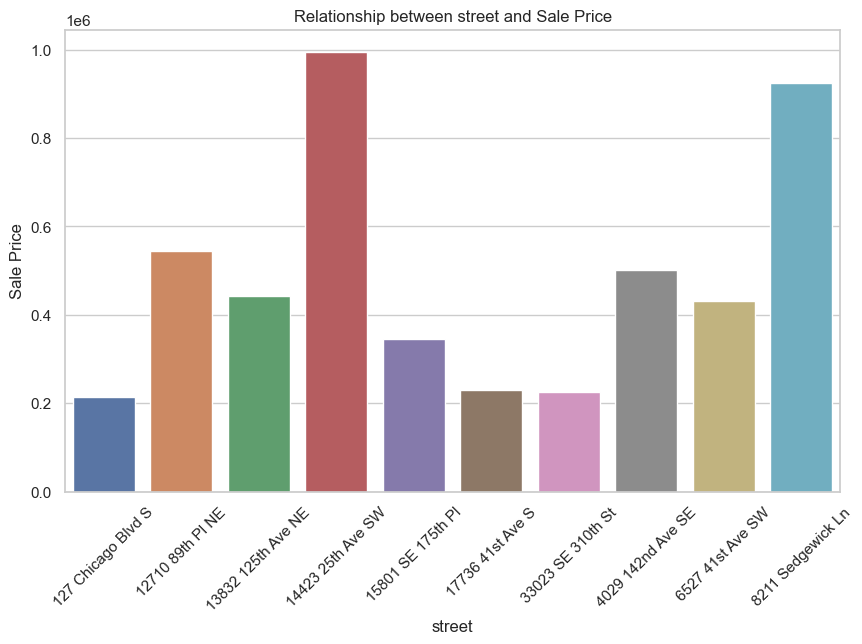

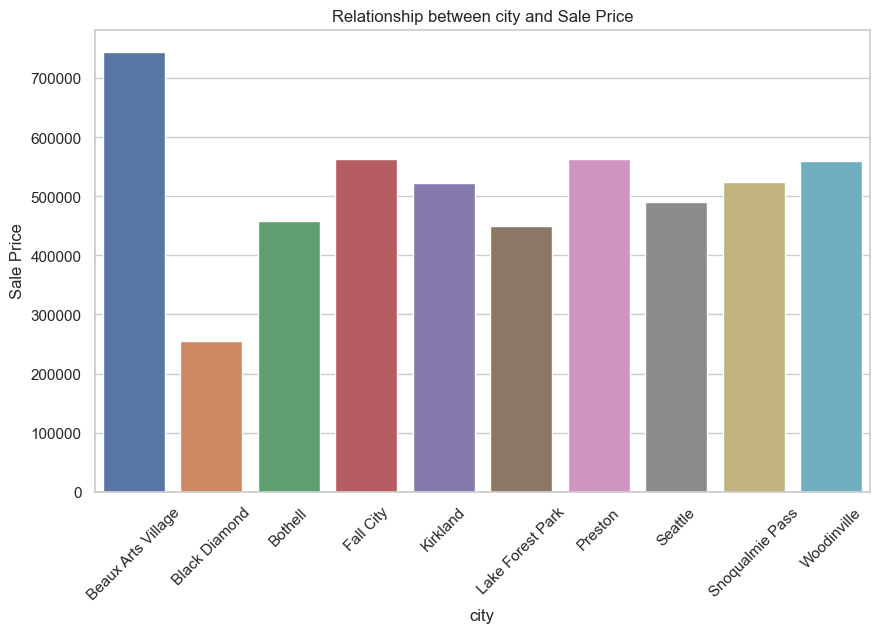

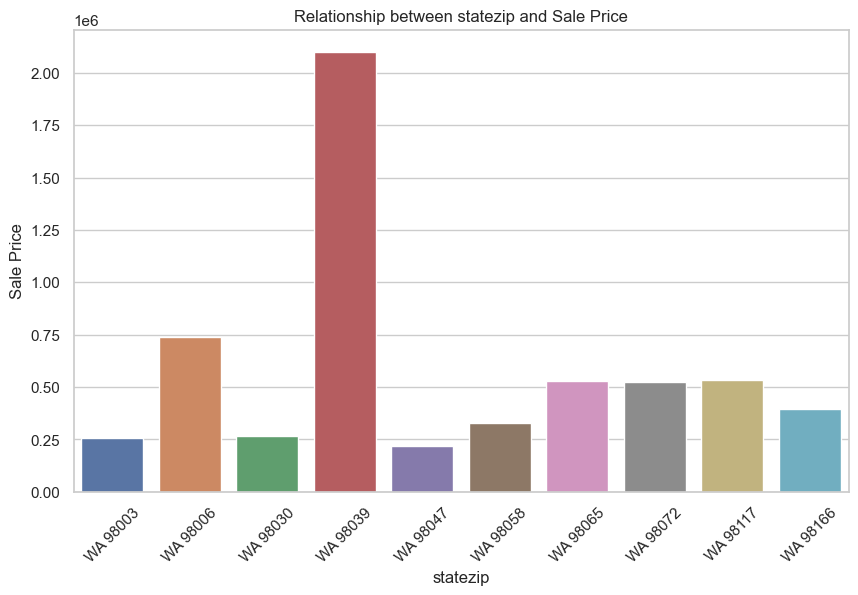

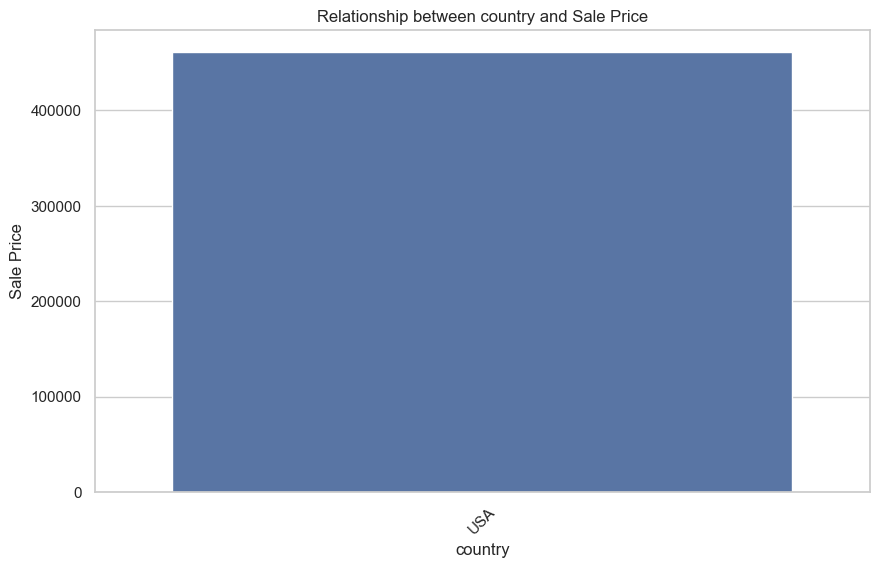

In [22]:
import random

# Define the number of categories to visualize for each categorical feature
num_categories_to_visualize = 10

# Loop through the categorical features
for feature in categorical_features:
    data = df.copy()
    
    # Select a random subset of categories to visualize
    unique_categories = data[feature].unique()
    random_categories = random.sample(list(unique_categories), min(num_categories_to_visualize, len(unique_categories)))
    data = data[data[feature].isin(random_categories)]
    
    # Group by the selected categories and calculate the median sale price
    median_prices = data.groupby(feature)['price'].median()
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=median_prices.index, y=median_prices.values)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(f'Relationship between {feature} and Sale Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Feature Selection

### Select specific columns to keep in the DataFrame for train the model


In [23]:
columns_to_keep = ['price','bedrooms', 'bathrooms', 'sqft_living']
df = df[columns_to_keep]

### Create a heatmap to visualize the correlation between columns in the DataFrame

<AxesSubplot: >

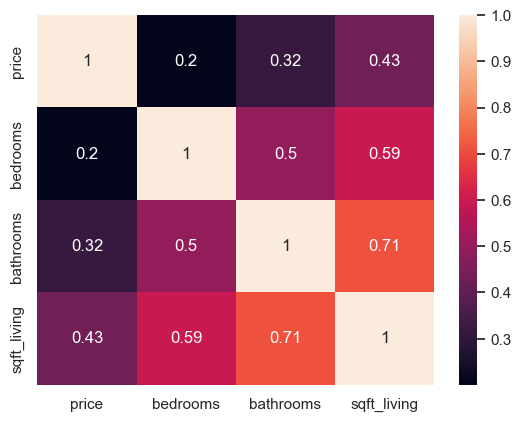

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
# Doing Log Transformation
df["sqft_living"] = np.log(df["sqft_living"])

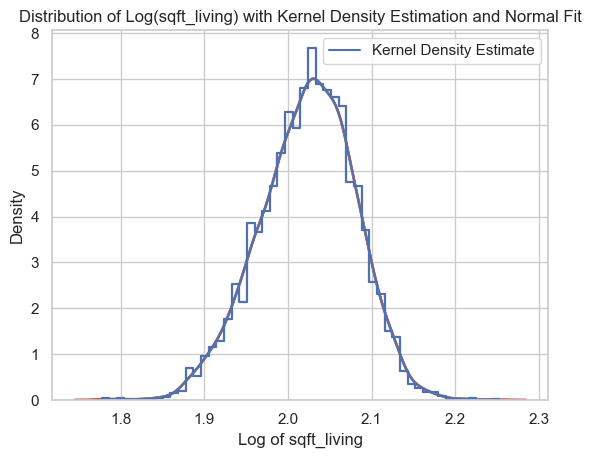

In [26]:
import seaborn as sns
from scipy import stats

# Create a histogram with a kernel density estimate and a fitted normal distribution
sns.histplot(np.log(df["sqft_living"]), kde=True, stat="density", common_norm=False, element="step", fill=False)
sns.kdeplot(np.log(df["sqft_living"]), color="r", linewidth=2, label="Kernel Density Estimate")
sns.histplot(np.log(df["sqft_living"]), stat="density", kde=True, common_norm=False, element="step", fill=False)
sns.histplot(np.log(df["sqft_living"]), stat="density", kde=True, common_norm=False, color="b", element="step", fill=False)
plt.legend(labels=["Kernel Density Estimate"])
# Optionally set labels and titles
plt.xlabel("Log of sqft_living")
plt.ylabel("Density")
plt.title("Distribution of Log(sqft_living) with Kernel Density Estimation and Normal Fit")

plt.show()

In [27]:
df.head()

,price,bedrooms,bathrooms,sqft_living
0,313000.0,3,1,7.200425
1,2384000.0,5,2,8.202482
2,342000.0,3,2,7.565275
3,420000.0,3,2,7.600902
4,550000.0,4,2,7.570443


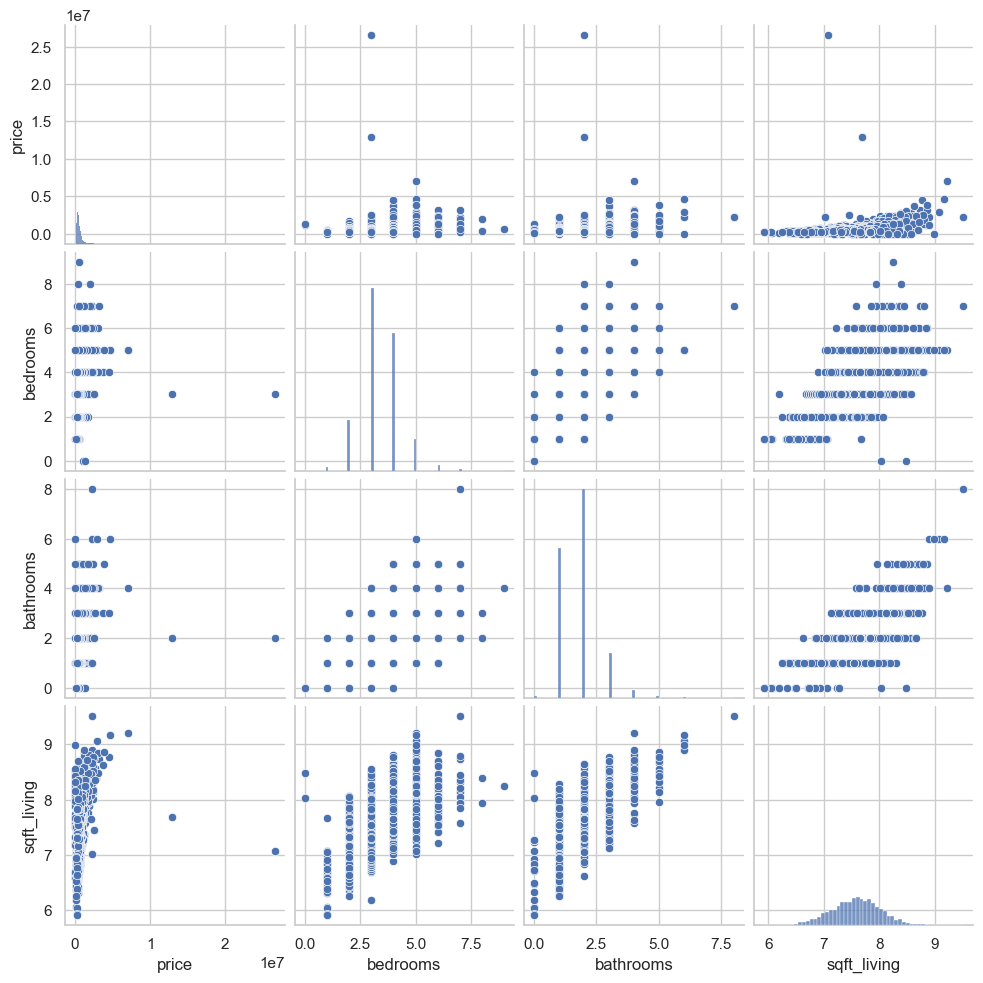

In [28]:
import seaborn as sns
sns.pairplot(df)

# Train The Model

In [29]:
# Train a Linear Regression model (we can split the data into training and testing sets)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = df[['bedrooms', 'bathrooms', 'sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.03


# Start Visualize The Model Performance

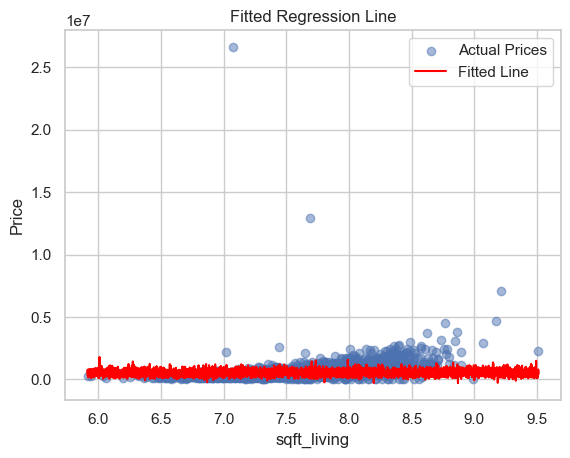

In [32]:
# Create a range of values for sqft_living for the regression line
sqft_living_range = np.linspace(X['sqft_living'].min(), X['sqft_living'].max(), len(X))

# Predict prices using the model for the range of sqft_living values
predicted_prices = model.predict(X)

# Plot the actual data points
plt.scatter(X['sqft_living'], y, label='Actual Prices', alpha=0.5)

# Plot the regression line
plt.plot(sqft_living_range, predicted_prices, color='red', label='Fitted Line')

plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Fitted Regression Line')
plt.legend()
plt.show()

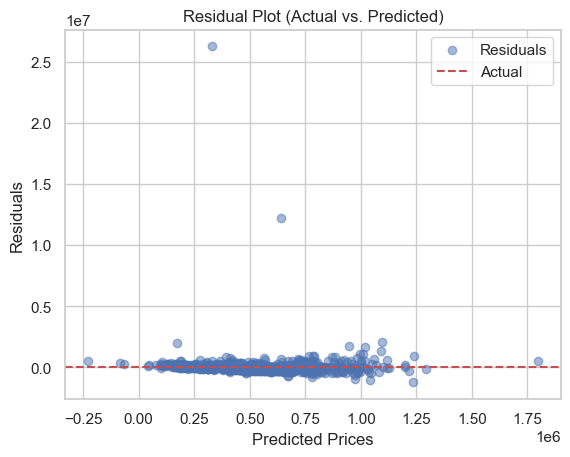

In [33]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, label='Predicted', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot (Actual vs. Predicted)')
plt.legend(['Residuals', 'Actual'])
plt.show()

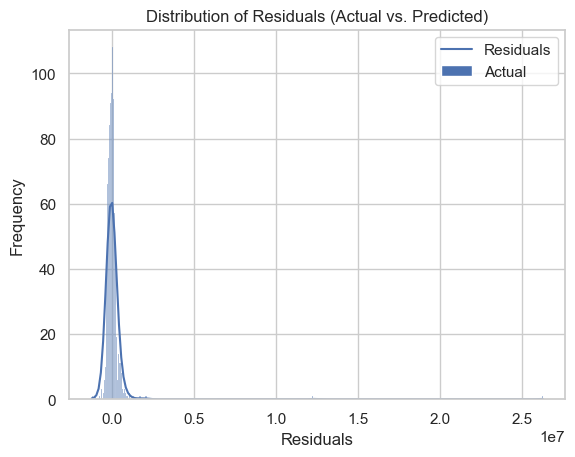

In [34]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Actual vs. Predicted)')
plt.legend(['Residuals', 'Actual'])
plt.show()

# Make Prediction on new Data

In [35]:
# Create new data for prediction as a DataFrame with the same column names
new_data = pd.DataFrame({'bedrooms': [3], 'bathrooms': [1], 'sqft_living': [np.log(1340)]})

# Use the model to predict the price for the new data
predicted_price = model.predict(new_data)

# Print the predicted price
print(f"Predicted Price for the new data: {predicted_price[0]}")

Predicted Price for the new data: 317742.83364950167


# Thank You